<a href="https://colab.research.google.com/github/sutanmuleta/Early-Detection-of-Ovarian-Cancer-Using-Machine-Learning-Models/blob/main/ovariancancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries for data handling and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Import libraries for model interpretation
# Install the shap library
!pip install shap

import shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()


Saving archive (4).zip to archive (4) (1).zip


In [ ]:
import os

# Unzip the uploaded file
os.system('unzip -o "archive (4).zip" -d /content/')


0

In [ ]:
# Use the os library to run a shell command to unzip the file
import os

# Unzip the file into the /content/ directory
os.system('unzip -o "archive (4).zip" -d /content/')

# List the files in the /content/ directory to confirm extraction
print("Extracted files:")
print(os.listdir('/content/'))


Extracted files:
['.config', 'archive (4).zip', 'Supplementary data 1.xlsx', 'Supplementary data 2.xlsx', 'Supplementary data 4.xlsx', 'archive (4) (1).zip', 'Supplementary data 5.xlsx', 'Supplementary data 3.xlsx', 'sample_data']


In [ ]:
import pandas as pd

# Load each Excel file into a pandas DataFrame
data1 = pd.read_excel('/content/Supplementary data 1.xlsx')
data2 = pd.read_excel('/content/Supplementary data 2.xlsx')
data3 = pd.read_excel('/content/Supplementary data 3.xlsx')
data4 = pd.read_excel('/content/Supplementary data 4.xlsx')
data5 = pd.read_excel('/content/Supplementary data 5.xlsx')

# Display the first few rows of each dataset to understand their structure
print("Data 1:")
print(data1.head())

print("\nData 2:")
print(data2.head())

print("\nData 3:")
print(data3.head())

print("\nData 4:")
print(data4.head())

print("\nData 5:")
print(data5.head())


Data 1:
   SUBJECT_ID      AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0           1   3.58\t  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1           2  34.24\t  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2           3   1.50\t  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3           4     2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4           5     2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   

    NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  
0  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4  
1  76.5  0.30  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2  
2  69.7  0.13  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2  
3  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6  
4  59.5  0.28  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0  

[5 rows x 51 columns]

Data 2:
  Biomarker             Biomarker Name
0       MPV       Mean platelet volume
1     BASO#

In [ ]:
# Display column names and data types for each dataset
print("Data 1 Info:")
print(data1.info())
print("\nData 2 Info:")
print(data2.info())
print("\nData 3 Info:")
print(data3.info())
print("\nData 4 Info:")
print(data4.info())
print("\nData 5 Info:")
print(data5.info())


Data 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    object 
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    object 
 13  CA19-9      325 non-null    object 
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 

In [ ]:
# Check for missing values in each dataset
print("Missing values in Data 1:")
print(data1.isnull().sum())

print("\nMissing values in Data 2:")
print(data2.isnull().sum())

print("\nMissing values in Data 3:")
print(data3.isnull().sum())

print("\nMissing values in Data 4:")
print(data4.isnull().sum())

print("\nMissing values in Data 5:")
print(data5.isnull().sum())


Missing values in Data 1:
SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

Missing values in Data 2:
Biomarker       

In [ ]:
# Convert object columns that should be numeric
for column in data1.columns:
    if data1[column].dtype == 'object':
        data1[column] = pd.to_numeric(data1[column], errors='coerce')

# Re-check data types to ensure conversion
print(data1.dtypes)


SUBJECT_ID      int64
AFP           float64
AG            float64
Age             int64
ALB           float64
ALP           float64
ALT           float64
AST           float64
BASO#         float64
BASO%         float64
BUN           float64
Ca            float64
CA125         float64
CA19-9        float64
CA72-4        float64
CEA           float64
CL            float64
CO2CP         float64
CREA          float64
TYPE            int64
DBIL          float64
EO#           float64
EO%           float64
GGT           float64
GLO           float64
GLU.          float64
HCT           float64
HE4           float64
HGB           float64
IBIL          float64
K             float64
LYM#          float64
LYM%          float64
MCH           float64
MCV           float64
Menopause       int64
Mg            float64
MONO#         float64
MONO%         float64
MPV           float64
Na            float64
NEU           float64
PCT           float64
PDW           float64
PHOS          float64
PLT       

In [ ]:
# Impute missing values with the mean for numeric columns
data1.fillna(data1.mean(), inplace=True)

# Check for missing values after imputation
print("Missing values after imputation:")
print(data1.isnull().sum())


Missing values after imputation:
SUBJECT_ID    0
AFP           0
AG            0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BASO#         0
BASO%         0
BUN           0
Ca            0
CA125         0
CA19-9        0
CA72-4        0
CEA           0
CL            0
CO2CP         0
CREA          0
TYPE          0
DBIL          0
EO#           0
EO%           0
GGT           0
GLO           0
GLU.          0
HCT           0
HE4           0
HGB           0
IBIL          0
K             0
LYM#          0
LYM%          0
MCH           0
MCV           0
Menopause     0
Mg            0
MONO#         0
MONO%         0
MPV           0
Na            0
NEU           0
PCT           0
PDW           0
PHOS          0
PLT           0
RBC           0
RDW           0
TBIL          0
TP            0
UA            0
dtype: int64


In [ ]:
# Example: Convert categorical variables to one-hot encoding
data1 = pd.get_dummies(data1, drop_first=True)

# Check the updated DataFrame
print(data1.head())


   SUBJECT_ID    AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0           1   3.58  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1           2  34.24  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2           3   1.50  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3           4   2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4           5   2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   

    NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  
0  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4  
1  76.5  0.30  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2  
2  69.7  0.13  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2  
3  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6  
4  59.5  0.28  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0  

[5 rows x 51 columns]


In [ ]:
# Display all column names
print(data1.columns)


Index(['SUBJECT_ID', 'AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#',
       'BASO%', 'BUN', 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP',
       'CREA', 'TYPE', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT',
       'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause',
       'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT',
       'RBC', 'RDW', 'TBIL', 'TP', 'UA'],
      dtype='object')


In [ ]:
# List all column names in the DataFrame
print(data1.columns)


Index(['SUBJECT_ID', 'AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#',
       'BASO%', 'BUN', 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP',
       'CREA', 'TYPE', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT',
       'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause',
       'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT',
       'RBC', 'RDW', 'TBIL', 'TP', 'UA'],
      dtype='object')


In [ ]:
# Display the first few rows of the DataFrame
print(data1.head())


   SUBJECT_ID    AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0           1   3.58  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1           2  34.24  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2           3   1.50  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3           4   2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4           5   2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   

    NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  
0  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4  
1  76.5  0.30  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2  
2  69.7  0.13  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2  
3  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6  
4  59.5  0.28  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0  

[5 rows x 51 columns]


In [ ]:
# Define a threshold for CA125 to indicate cancer presence
# You should replace `threshold_value` with a medically appropriate cutoff for CA125 levels
threshold_value = 35  # Example threshold, adjust based on domain knowledge

# Create a binary target column where 1 indicates potential cancer presence and 0 indicates absence
data1['Cancer_Present'] = (data1['CA125'] > threshold_value).astype(int)

# Define features and target variable
X = data1.drop(columns=['SUBJECT_ID', 'Cancer_Present'])  # Exclude subject ID and target column
y = data1['Cancer_Present']  # Use the new target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' if needed
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00
Confusion Matrix:
[[28  0]
 [ 0 42]]


Feature Importances:
CA125: 0.4377
HE4: 0.0652
TYPE: 0.0534
NEU: 0.0287
LYM%: 0.0285
MONO#: 0.0218
TBIL: 0.0185
CA19-9: 0.0180
ALB: 0.0172
CEA: 0.0156
DBIL: 0.0150
Age: 0.0144
PLT: 0.0110
MPV: 0.0110
Ca: 0.0100
TP: 0.0093
MCV: 0.0093
UA: 0.0091
MCH: 0.0090
PCT: 0.0090
ALT: 0.0087
RBC: 0.0085
PDW: 0.0084
BASO%: 0.0083
IBIL: 0.0081
BUN: 0.0080
ALP: 0.0079
Na: 0.0073
CREA: 0.0072
CL: 0.0072
K: 0.0070
GLO: 0.0069
RDW: 0.0066
GLU.: 0.0064
EO#: 0.0064
PHOS: 0.0062
AFP: 0.0062
HGB: 0.0061
Mg: 0.0058
LYM#: 0.0056
BASO#: 0.0056
EO%: 0.0051
CA72-4: 0.0051
MONO%: 0.0048
GGT: 0.0047
CO2CP: 0.0043
AST: 0.0043
HCT: 0.0042
AG: 0.0038
Menopause: 0.0035


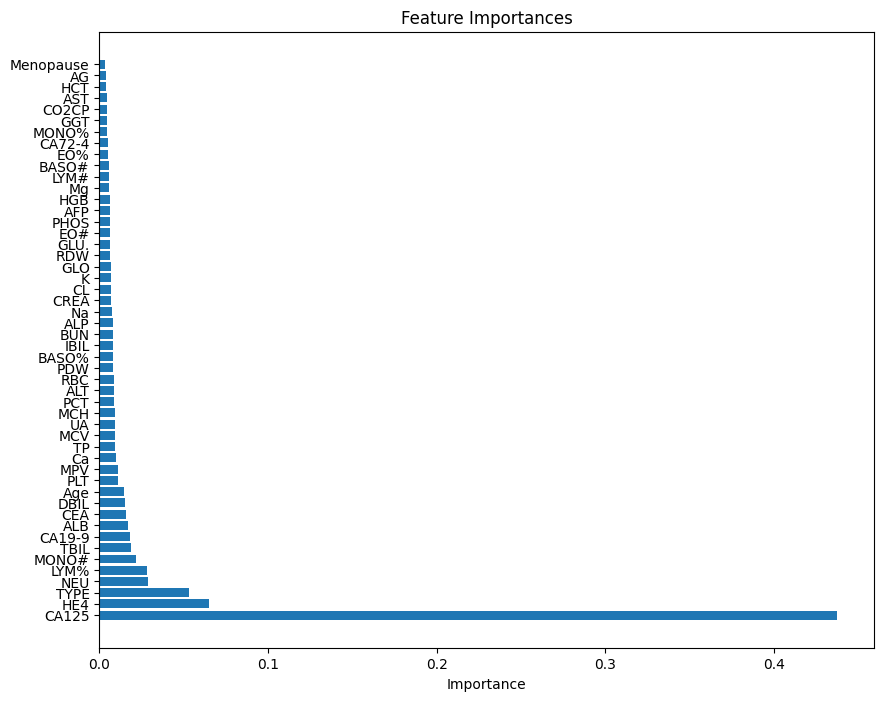

In [ ]:
# Feature Importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Print feature importances
print("Feature Importances:")
for importance, name in feature_importances:
    print(f"{name}: {importance:.4f}")

# Optionally, plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh([name for _, name in feature_importances], [importance for importance, _ in feature_importances])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.87142857 1.         1.         0.97142857 1.        ]
Mean CV Accuracy: 0.9685714285714286


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearch
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearch
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9964285714285716


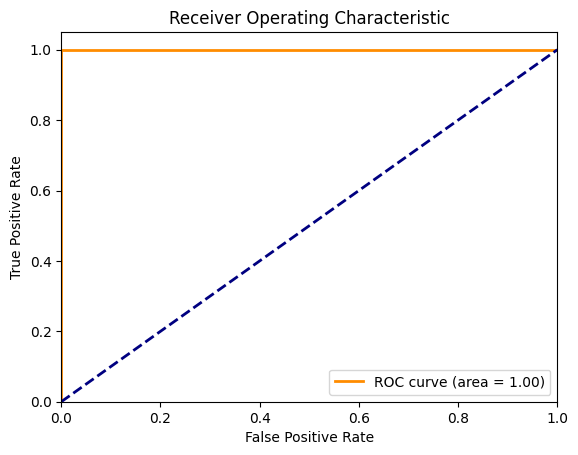

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


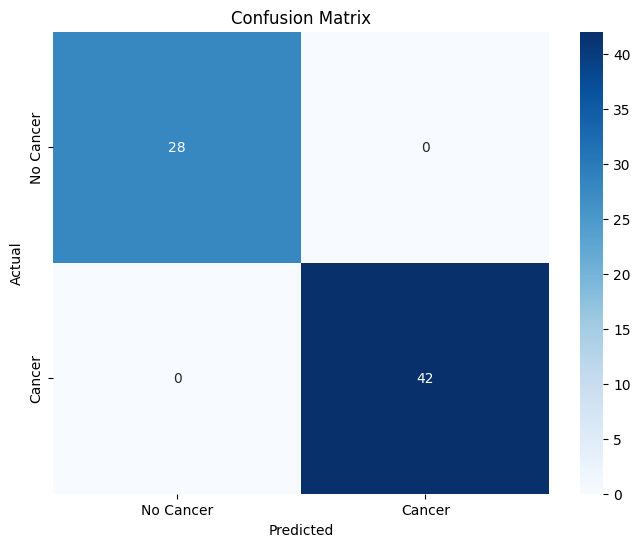

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


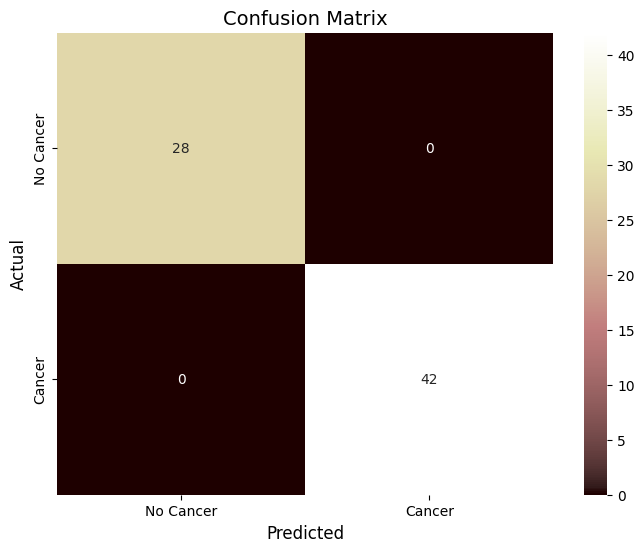

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [ ]:
from joblib import dump

# Save the model to a file
dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [ ]:
from joblib import load

# Load the model from the file
loaded_model = load('random_forest_model.joblib')

# Use the loaded model to make predictions
# predictions = loaded_model.predict(X_test)
